# Kinetics VI

This lecture covers the analysis differential tubular reactors (plug flow or packed bed reactors). We also introduce a demonstration of "non-elementary" or non-power law kinetics observed during Azomethane decomposition.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stats
from math import ceil, floor

## Example Problem 01

The decomposition of Azomethane is carried out in a 50 mL Plug Flow Reactor operating under differential conditions at steady state. The reaction is given below:

$$C_2H_6N_2 \longrightarrow C_2H_6 + N_2$$

Azomethane is thermodynamically very favorable, so you can assume the reaction is irreversible.  For convenience, we will just relabel everything as:

$$A \longrightarrow B + C$$

For this experiment, you vary the feed concentration while maintaining a very high volumetric flowrate (your space time approaches zero). This ensures the fractional conversion of A stays well below 1\% for all experiments. At each unique feed concentration, you measure the concentration of species B in the reactor effluent and use it to determine the effluent molar flowrate of species B. The collected data are compiled in the table below. 

|**C$_{Af}$   (mmol/L)**  | **F$_B$ (mmol/min)**     | 
|:-----------------------:|:-----------------------:|
|0.001                    | 2.45 $\times$ 10$^{-9}$ |
|0.002                    | 9.08 $\times$ 10$^{-9}$ |
|0.005                    | 6.29 $\times$ 10$^{-8}$ |
|0.010                    | 2.27 $\times$ 10$^{-7}$ |
|0.020                    | 9.50 $\times$ 10$^{-7}$ |
|0.050                    | 5.39 $\times$ 10$^{-6}$ |
|0.100                    | 2.05 $\times$ 10$^{-5}$ |
|0.200                    | 5.72 $\times$ 10$^{-5}$ |
|0.500                    | 2.43 $\times$ 10$^{-4}$ |
|1.000                    | 6.71 $\times$ 10$^{-4}$ |
|2.000                    | 1.56 $\times$ 10$^{-3}$ |
|5.000                    | 4.25 $\times$ 10$^{-3}$ |
|10.00                    | 7.43 $\times$ 10$^{-3}$ |
|20.00                    | 1.70 $\times$ 10$^{-2}$ |
|50.00                    | 3.98 $\times$ 10$^{-2}$ |
|100.0                    | 7.99 $\times$ 10$^{-2}$ |

Assuming the reaction rate is described by power law kinetics,

$$r = k{C_A}^{\alpha}$$ 

where $\alpha$ is an integer, use the measured concentrations of A in the reactor effluent to determine the reaction order in A and the rate constant for this reaction.

In [24]:
V  = 0.050 #L
CA_exp = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]) #mmol/L
FB_exp = np.array([2.01E-09, 1.09E-08, 5.98E-08, 2.53E-07, 9.75E-07, 5.84E-06, 1.82E-05, 6.89E-05, 2.03E-04, 5.23E-04, 1.60E-03, 3.75E-03, 8.40E-03, 1.49E-02, 4.52E-02, 7.10E-02]) #mmol/min

### Solution to Example Problem 01

A differential tubular reactor is a bit of a different concept than what we've covered so far.  The idea is that you operate the reactor so close to 0% conversion that the composition is constant across the reactor.  We also generally would operate a differential reactor in such a way that the change in temperature and pressure across the reactor is neglible.  This is important because we generally expect that reaction rate depends on temperature, pressure, and composition.  If those three things are constant across the reactor Volume (or catalyst bed), then the reaction rate is also constant across the length of the reactor.  We start by writing a material balance on the tubular reactor.  In this case, it is a PFR:

$$\frac{dF_A}{dV} = R_A$$

We have a single reaction with a coefficient of -1 on A, so $R_A = -r$.

$$\frac{dF_A}{dV} = -r$$

As usual, we find that the derivative of molar flowrate with respect to volume would give us the reaction rate.  In this specific case of a differential reactor, we take advantage of the fact that the rate is constant with respect to reactor volume. Separating variables, we get:

$$dF_A = -rdV$$

We want to integrate this from inlet to outlet of the PFR:

$$\int_{F_{A,f}}^{F_A} dF_A = \int_0^V-rdV$$

Here, we take advantage of the fact that the rate is constant, so it is independent of volume:

$$\int_{F_{A,f}}^{F_A} dF_A = -r\int_0^VdV$$

So this equation becomes easy to solve.  We find:

$$F_{A} - F_{A,f} = -rV$$

Solving for r:

$$r = \frac{F_{A,f} - F_A}{V}$$

In other words, if we take the difference between the feed and exit molar flowrate of A, and we divide it by the volume of the reactor, we get an exact value of the reaction rate at the relevant concentration, temperature, and pressure at the reactor inlet.  We have a problem here, though, because as $X_A \rightarrow 0$, we know that $F_A \rightarrow F_{A,f}$. We encountered this already in analyzing CSTR data obtained at very short values of $\tau$, where conversion was nearly 0%.

#### Use Product Flowrates to estimate rate

Usually, our precision in quantifying the molar flowrate of species A coming out of the differential reactor is, at best, $\pm 5%$.  That means the difference between the feed and exit flowrate of A is within our precision limits, and we get very noisy estimates of reaction rates if we try to quantify things this way. As we saw with the CSTR problem, when reactors are operated such that reactant conversion approaches zero, the better approach is to use reaction product measurements to estimate the rate of reaction.  The approach is very similar, we just start by writing a balance on a product instead of on a reactant:

$$\frac{dF_B}{dV} = R_B$$

For a single reaction where species B has a coefficient of 1:

$$\frac{dF_B}{dV} = r$$

We'll separate this ODE and integrate over the appropriate limits:

$$\int_{F_{B,f}}^{F_B}dF_B = \int_0^VrdV$$

Again, we know that rate is not changing over the reactor volume, so r is a constant in this case.  This allows the following simplification:

$$\int_{F_{B,f}}^{F_B}dF_B = r\int_0^VdV$$

Which makes the integration pretty straightforward.  We ultimately get:

$$F_B - F_{B,f} = rV$$

We know that there is no species B coming into the reactor, so $F_{B,f} = 0$.  We then solve for r:

$$r = \frac{F_B}{V}$$

This is really a useful result!  It means that estimating the reaction rate just requires us to measure the flowrate of product coming out of the reactor and divide it by the reactor volume.

That's the approach we'll use below.

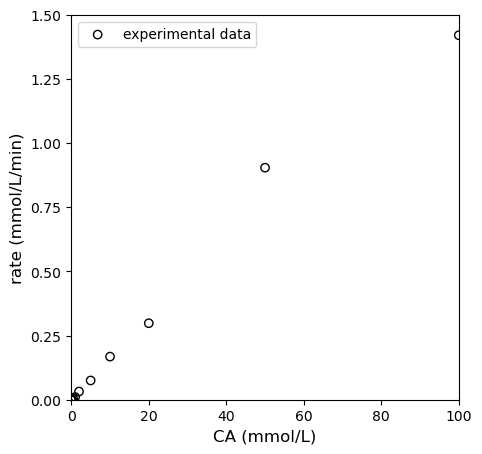

In [25]:
r_exp = FB_exp/V #mol/L/min

plt.figure(1, figsize = (5, 5))
plt.scatter(CA_exp, r_exp, color = 'none', edgecolor = 'black', marker = 'o', label = 'experimental data')
plt.xlabel('CA (mmol/L)', fontsize = 12)
plt.ylabel('rate (mmol/L/min)', fontsize = 12)
plt.xlim(0, 100)
plt.ylim(0, 1.5)
plt.yticks(np.arange(0, 1.6, 0.25))
plt.legend(loc = 'upper left')
plt.show()

#### Linearization of data

Now we have estimates of the reaction rate for various values of feed concentration of A.  Since we are operating the reactor at very low conversion, we know that the concentration of A throughout the reactor is approximately equal to the feed concentration of A.  Thus, we have a set of rates at a representative set of concentrations of the reactant.  We go back to the power law kinetics we originally proposed:

$$r = k \, {C_A}^\alpha$$

We linearize as usual:

$$\ln(r) = \ln(k) + \alpha \ln(C_A)$$

We can then plot $\ln(r)$ vs. $\ln(C_A)$, check linearity...

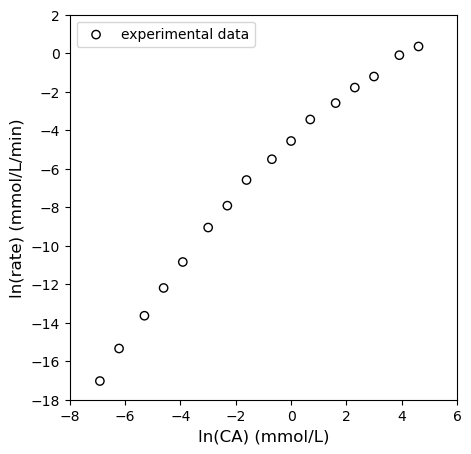

In [26]:
plt.figure(1, figsize = (5, 5))
plt.scatter(np.log(CA_exp), np.log(r_exp), color = 'none', edgecolor = 'black', marker = 'o', label = 'experimental data')
plt.xlabel('ln(CA) (mmol/L)', fontsize = 12)
plt.ylabel('ln(rate) (mmol/L/min)', fontsize = 12)
plt.xlim(-8, 6)
plt.ylim(-18, 2)
plt.yticks(np.arange(-18, 3, 2))
plt.legend(loc = 'upper left')
plt.show()

#### Linear Regression to estimate $\alpha$ and k

That doesn't really look very linear, but let's go ahead and add a best fit line and calculate relevant statistics about the fit to give us a quantitative assessment.

m    = 1.50e+00 +/- 1.23e-01
b    = -5.23e+00 +/- 4.59e-01
SSE  = 9.28
SST  = 463.79
MSE  = 0.58
RMSE = 0.76
R2   = 0.98
α    = 1.50e+00 +/- 1.23e-01
k    = 5.33e-03 (but is between 3.37e-03 and 8.44e-03)


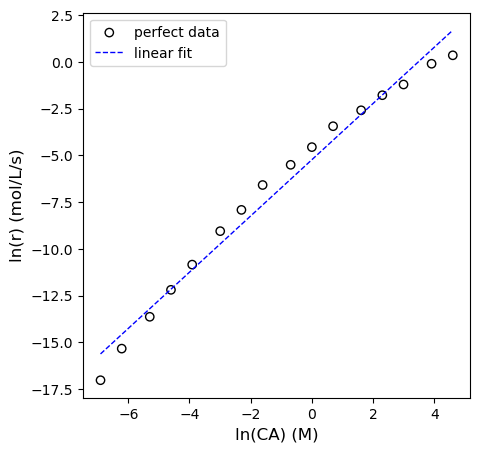

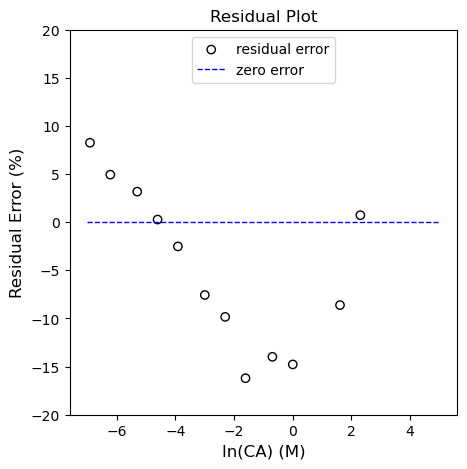

In [27]:
ydata = np.log(r_exp)
xdata = np.log(CA_exp)

X     = np.vander(xdata, 2)#This creates the X matrix shown above, truncating at 1st order
Y     = ydata    
A     = np.linalg.solve(X.T@X, X.T@Y) 
Ypred = X@A
Ybar  = np.mean(ydata)
Ndata = len(ydata)
SSE   = (Y - X@A).T@(Y - X@A) #Residual sum of squares, equivalent to SSE = np.sum((Y - Ypred)**2)
SST   = np.sum((Y - Ybar)**2) #Total sum of squares
MSE   = SSE/Ndata             #Mean Square Error
RMSE  = np.sqrt(MSE)          #Root Mean Square Error
R2    = 1 - SSE/SST           #R^2
DOF   = len(ydata) - len(A)   #Degrees of freedom = number of measurements - number of regressed parameters
s2    = SSE/DOF               #Estimate of variance, s2 ~ σ2  
COV   = s2*np.linalg.inv(X.T@X) #Covariance matrix, use for standard errors and conf. intervals
m     = A[0]                #slope of best fit line
b     = A[1]                  #y-intercept of best fit line
SEm   = np.sqrt(COV[0, 0])    #Standard error in slope
SEb   = np.sqrt(COV[1, 1])    #Standard error in y-intercept
tval  = stats.t.ppf(0.975, DOF) #t distribution value for 95% confidence intervals
CIm   = SEm*tval              #95% confidence interval on slope
CIb   = SEb*tval              #95% confidence interval on y-intercept
α     = m
k     = np.exp(b)
labels = ['m', 'b', 'SSE', 'SST','MSE','RMSE', 'R2', 'α', 'k']
values = [m  ,  b ,  SSE ,  SST , MSE , RMSE ,  R2, α, k]

for label, value in zip(labels, values):
    if label == 'm':
        print(f'{label:4s} = {value:0.2e} +/- {CIm:0.2e}')
    elif label == 'b':
        print(f'{label:4s} = {value:0.2e} +/- {CIb:0.2e}')
    elif label == 'α':
        print(f'{label:4s} = {value:0.2e} +/- {CIm:0.2e}')
    elif label == 'k':
        print(f'{label:4s} = {value:0.2e} (but is between {np.exp(b-CIb):0.2e} and {np.exp(b+CIb):0.2e})')
    else:
        print(f'{label:4s} = {value:0.2f}')
        
plt.figure(1, figsize = (5, 5))
plt.scatter(X[:, 0], Y, marker = 'o', color = 'none', edgecolor = 'black', label = 'perfect data')
plt.plot(X[:, 0], Ypred, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'linear fit')
plt.xlabel('ln(CA) (M)', fontsize = 12)
plt.ylabel('ln(r) (mol/L/s)', fontsize = 12)
plt.legend()
plt.show()

plt.figure(2, figsize = (5, 5))
plt.scatter(X[:, 0], (Y - Ypred)/Y*100, marker = 'o', color = 'none', edgecolor = 'black', label = 'residual error')
plt.hlines(0, floor(min(X[:, 0])), ceil(max(X[:,0])), color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.xlabel('ln(CA) (M)', fontsize = 12)
plt.ylabel('Residual Error (%)', fontsize = 12)
plt.title('Residual Plot')
plt.ylim(-20, 20)
plt.legend(loc = 'upper center')
plt.show()

#### A closer look

OK, there are some problems here.  While the R2 value isn't bad, we see clear systematic deviation instead of data points scattered randomly around the line of best fit.  This suggests that our power law model is not correct.  Furthermore, we get a "best fit" reaction order of 1.5, which is a bit strange.  Let's take a closer look.  

If you focus only on data obtained at low concentration, you see good linearity.  Similarly, at very high concentrations, we see linearity again.  This suggests power law kinetics hold at very low and very high concentrations of A.  I'll go ahead and fit a line to the 4 lowest concentration measurements and the 4 highest concentration measurements.  We'll add those to the plot and see if we can figure out what is happening.

The regressed order at low CA is 2.095
The regressed order at high CA is 0.966


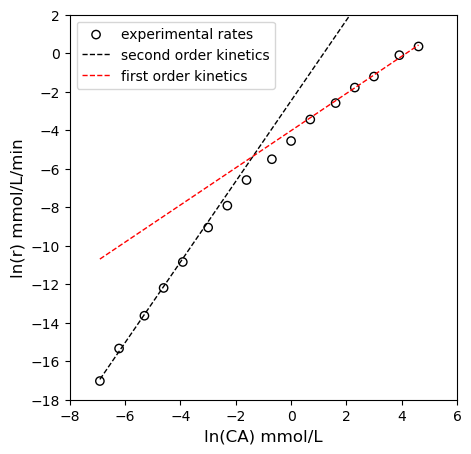

In [28]:
Y      = np.log(r_exp)
X      = np.vander(np.log(CA_exp), 2)
Alow  = np.linalg.solve(X[0:3,:].T@X[0:3,:], X[0:3,:].T@Y[0:3]) #regression coefficients, slope and intercept
Ahigh = np.linalg.solve(X[-4:,:].T@X[-4:,:], X[-4:,:].T@Y[-4:]) #regression coefficients, slope and intercept
Yplow = X@Alow
Yphigh = X@Ahigh

print(f'The regressed order at low CA is {Alow[0]:3.3f}')
print(f'The regressed order at high CA is {Ahigh[0]:3.3f}')
plt.figure(1, figsize = (5, 5))
plt.scatter(X[:, 0], Y, marker = 'o', color = 'none', edgecolor = 'black', label = 'experimental rates')
plt.plot(np.log(CA_exp), Yplow, color = 'black', linestyle = 'dashed', linewidth = 1, label = 'second order kinetics')
plt.plot(np.log(CA_exp), Yphigh, color = 'red', linestyle = 'dashed', linewidth = 1, label = 'first order kinetics')
plt.xlabel('ln(CA) mmol/L', fontsize = 12)
plt.ylabel('ln(r) mmol/L/min', fontsize = 12)
plt.xlim(-8, 6)
plt.ylim(-18, 2)
plt.yticks(np.arange(-18, 3, 2))
plt.legend()
plt.show()

So what we see is that the reaction kinetics actually change depending on the concentration where we measure them.  If we make measurements at very low concentrations of A, the rate is second order in A.  If we make measurements at very high concentrations of A, the rate is first order in A.

The reason for this is basically that Azomethane decomposition (and almost every other reaction we might study in the lab) is an overall reaction.  It describes the stoichiometric changes between observable reactants and products, but it does not describe the bond breaking and bond forming events that comprise the chemical transformations.  That information is given by an elementary step.

## Reaction Mechanisms

The basic concept to understand here is that overall reactions, like the one we wrote above for Azomethane decomposition, reflect the stoichiometric changes that we see at the macroscopic scale in our laboratories and industrial reactors.  In reality, chemistry doesn't happen as it is written in the overall reaction.  At the molecular level, chemical transformations occur through a series of what we call ***elementary steps***.  These are reactions that occur exactly as written.  They usually reflect either scission or formation of a single bond. In some cases, they might involve formation and/or scission of two bonds. Rarely do they involve more complex events than this.

Every elementary step has a characteristic enthalpy, entropy, and free energy change of reaction. These describe the formation of products of the step from the reactants of the step, and it determines how ***thermodynamically favorable*** that elementary step is. We use these energy/entropy transitions to calculate the ***equilibrium constant*** for that elementary step.  Every elementary step also has a characteristic enthalpy, entropy, and free energy of activation.  These describe the formation of a transition state from the reactants participating in the elementary step, and they determine how ***kinetically favorable*** a reaction is. We use these energy/entropy transitions to calculate the ***rate constant*** for that elementary step. Generally, thermodynamics determine ***how far*** a reaction will go, and kinetics determine ***how fast*** a reaction will occur.

We've already been introduced to these concepts, it's just that, for a reaction mechanism, we will chain together multiple elementary steps, each with their own rate and equilibrium constant, in order to make up the overall, observable reaction.

### Azomethane Decomposition: A Possible Mechanism

When scientists originally observed that unimolecular reactions like Azomethane decomposition were second order at low concentrations and first order at high concentrations, they considered phenomena that would lead to this observation.  An early concept was proposed by Lindemann and Christensen--in simple terms, their idea was that Azomethane (or a molecule like it) cannot undergo decomposition until it is "activated" by some energetic collision with a second Azomethane molecule. This collision would place the Azomethane into an excited state that is unstable and could do one of two things.  First, it could either dissapate this energy and return to its ground state without decomposing.  Second, it could decompose.

We can translate that conceptual description of the molecular events underlying azomethane decomposition into a pair of elementary steps.  In general, we will assume that all elementary steps are reversible.  If we can convert reactants into products by passing through a high energy transition state, then we have to be able to traverse the same energetic pathway in reverse going from products, through the same transition state, and back to reactants (microscopic reversibility and detailed balance).  Each step, $i$, has a forward rate constant, $k_{i}$, a reverse rate constant, $k_{-i}$, and an equilibrium constant, $K_i$.  We may recall that for an elementary step, or for a step with elementary kinetics, the following is also true:

$$K_{C,i} = \frac{k_{i}}{k_{-i}}$$

With that in mind, we propose the following set of elementary steps as the mechanism of Azomethane decomposition.

\begin{align}
    &(1) \qquad A + A \rightleftharpoons A^* + A\\
    &(2) \qquad A^* \rightleftharpoons B + C\\
\end{align}

Another requirement of a reaction mechanism is that we have to be able to reproduce overall stoichiometry through a linear combination of elementary steps.  For example, in the above mechanism, if we add step (1) and step (2) together, we would get:

$$A \rightleftharpoons B + C$$

Which is the overall stoichiometry of azomethane decomposition.

Here, we'll make a simplifying assumption that is based on our insight into a decomposition reaction.  These are generally thermodynamically very favorable ($\Delta G < -100$ kJ/mol); as such, the equilibrium constant for the decomposition step and thus the overall reaction is very large, and we can assume both the second elementary step and the overall reaction are irreversible.  We'll update the steps accordingly.

**Mechanism**

\begin{align}
    &(1) \qquad A + A \rightleftharpoons A^* + A\\
    &(2) \qquad A^* \longrightarrow B + C\\
\end{align}

**Overall**

$$A \longrightarrow B + C$$

### Is the mechanism consistent with our observations?

The next requirement of a mechanism is that it has to qualitatively agree with what we observe in the laboratory. In this case, this mechanism has to predict that the overall rate of reaction is 2nd order in A at low concentrations and first order of A at high concentrations.  If it does not, then it is either incorrect or at the very least an incomplete description of the chemistry.

It is not immediately clear how that mechanism will give us the overall reaction rate.  Considering the overall reaction rate, we see that, in the laboratory, a few things must be true:

\begin{align}
    r &= -R_A \\
    r &= R_B \\
    r &= R_C \\
\end{align}

We can go to our mechanism to write any of those net production rates by considering the formation/consumption of each species in the mechanism.  So, for example:

\begin{align}
    R_A &= -r_1 \\
    R_B &=  r_2  \\
    R_C &=  r_2  \\
\end{align}

So, looking at that, we can make the following relationships between our overall rate and the rate of each elementary step:

\begin{align}
    r &= r_1 \\
    r &= r_2
\end{align}

I can pick either one and work through the derivation.  Eventually, they will lead to the same place.  My preference is, when possible, to find the step where the product is formed, especially if it is an irreversible step.  This usually gives me a slightly less cumbersome starting equation.  This seems to be the general preference in textbooks as well.  With that established, let's say:

$$r = r_2$$

That tells us that the net rate of reaction has to be equal to the rate of the 2nd elementary step, which makes sense because it is the only step where our product, B, is formed.  Now, let's write out the rate expression for that step.  Since it is an elementary step, we can write it by inspection:

$$r = r_2 = k_{2}{C_{A^*}}$$

Now we run into a problem -- that isn't a convenient rate expression because it is written in terms of an activated, probably very reactive intermediate.  It is generally going to be very hard for us to observe this species in the reaction mixture, and we certainly can't control it, quantify it with lab instruments, or purchase it from a supplier.  It forms in situ and it is present only in trace quantities.  We would much rather have this rate expression written in terms of concentrations of stable species, namely A, B, and/or C.  The reason is that we can measure, control, quantify, etc. the concentrations of these species, so they are useful to us in designing and operating the reactor.  We therefore would like to **express** the concentration of the high energy species in terms of the stable species.  There are many ways we can approach this; all of them will generally involve some approximation about that species and the rate of its formation and consumption.

### The Pseudo steady state approximation

For homogeneous reactions, we frequently will assume that these high energy intermediates (things like radicals, ions, high energy states, etc.) satisfy two requirements:

1. Their formation is usually challenging (thermodynamically and kinetically), so they form slowly and are generally present in small quantities.
2. They are reactive, so they tend to be consumed quickly.

When these requirements are met, we generally consider that this species effectively reacts as soon as it forms, so its concentration in the system is not changing appreciably.  In other words, its net rate production rate is zero.  This is generally called the **Pseudo Steady State Assumption** or various forms of that (Pseudo Steady State Hypothesis, Quasi Steady State Assumption, Quasi Steady State Hypothesis).  

We first write the production rate for the high energy intermediate $A^*$:

$$R_{A^*} = r_1 - r_2$$

Then we apply the PSSH by setting the net production rate to zero:

$$0 = r_1 - r_2$$

(Note that this leads to the conclusion that $r_1 = r_2$, but we'll work with the above form here)

We can now substitute rate expressions into the PSSH equation:

$$0 = k_1{C_A}^2 - k_{-1}C_{A^*}C_A - k_2C_{A^*}$$

Now the beauty and utility of that approximation become clear: we have an equation written in one "unknown", $C_{A^*}$. This means that we can solve the above to develop an expression for $C_{A^*}$ as a function of $C_A$ and various rate constants.  Doing so, we get:

$$C_{A^*} = \frac{k_1 {C_A}^2}{k_2 + k_{-1}C_A}$$

Now I can substitute that back into my rate expression for step 2 (which is equal to the rate of product formation and thus the overall rate of reaction):

$$r = \frac{k_1 k_2 {C_A}^2}{k_2 + k_{-1}C_A}$$

I'm going to simplify this just a little, mostly because I like the first term in the denominator polynomial to be a 1.

$$r = \frac{k_1 {C_A}^2}{1 + K^\prime C_A}$$

Where we define $K^\prime = k_{-1}/k_2$

### Reconciliation with Observed trends

Now we have an overall rate expression written only in terms of $C_A$ and various kinetic parameters.

$$r = \frac{k_1 {C_A}^2}{1 + K^\prime C_A}$$

Before we go further, let's make sure that this expression at least *can* predict the behavior we observe in the reactor.  We know that this reaction appears 2nd order in Azomethane (A) at low concentrations and first order in A at high concentrations.  We can determine if the rate expression can predict this with an analysis of limiting behavior.  First, let's consider the limit as $C_A \rightarrow 0$.

#### Low concentration limit

In this case, the overall rate clearly approaches zero, but that's not what we're interested in.  We're interested in how the rate responds to changes in the concentration of A at low concentrations.  So we look at dominat terms in the numerator and denominator as $C_A \rightarrow 0$. In this regime, the dominant term in the numerator is $kC_A^2$.  In other words, the numerator has a second order dependence on $C_A$ in the limit of low concentration.  If we look at the denominator, we see that, as $C_A \rightarrow 0$, then $1 >> K^\prime C_A$.  Accordingly, the dominant term in the denominator is 1.

With these behaviors established, we conclude that at low concentrations, the rate of reaction should look like this:

$$r = \frac{k_1 {C_A}^2}{1} = k_1 {C_A}^2$$

In other words, the rate of reaction is second order in A at low concentrations, just as observed in experiments.

#### High concentration limit

Now, we'll let $C_A \rightarrow \infty$ and repeat analysis of dominant terms in the numerator and denominator.  The dominant term in the numerator is again $k_1C_A^2$, so the numerator still has a second order dependence on the concentration of A. Looking at the denominator, as $C_A \rightarrow \infty$, then $1 << K^\prime C_A$.  So the second term is dominant, and our rate expression becomes:

$$r = \frac{k_1 {C_A}^2}{K^\prime C_A} = \frac{k_1}{K^\prime} {C_A}$$

That is, at high concentrations of A, the reaction is first order in A, just as observed in laboratory.

#### Conclusion

Based on this analysis, we can conclude that this mechanism is consistent with our observations in the laboratory.  We can't prove it, of course, but we can say that it captures our observations and so is at least plausible.  We now would proceed to trying to estimate the values of our two parameters, $k_1$ and $K^\prime$ based on analysis of our data.

We can do this in a few ways.  The most obvious and straightforward is to use nonlinear regression.  That is, we would minimize the sum of squares of errors by optimizing the values of the two parameters.  This is implemented in the cell below.  Notice that I'm defining my residual error as a percentage error here instead of an absolute error.  This is because the rates measured vary over orders of magnitude, and absolute errors for numbers like $10^{-8}$ are small compared to those for numbers like 1 or 10.  The percent error is scaled, so it makes sure our regression weights small measurements correctly.

In [40]:
V  = 0.050 #L
CA_exp = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]) #mol/L
FB_exp = np.array([2.01E-09, 1.09E-08, 5.98E-08, 2.53E-07, 9.75E-07, 5.84E-06, 1.82E-05, 6.89E-05, 2.03E-04, 5.23E-04, 1.60E-03, 3.75E-03, 8.40E-03, 1.49E-02, 4.52E-02, 7.10E-02]) #mol/min
r_exp  = FB_exp/V #mol/L/min

def OBJ(par):
    #experimental data
    CA_exp = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]) #mol/L
    FB_exp = np.array([2.01E-09, 1.09E-08, 5.98E-08, 2.53E-07, 9.75E-07, 5.84E-06, 1.82E-05, 6.89E-05, 2.03E-04, 5.23E-04, 1.60E-03, 3.75E-03, 8.40E-03, 1.49E-02, 4.52E-02, 7.10E-02]) #mol/min
    r_exp  = FB_exp/V #mol/L/min

    #parameter values
    k1, Kprime = par
    
    #model prediction
    r_mod = k1*CA_exp**2/(1 + Kprime*CA_exp)
    
    #SSE
    SSE = np.sum(((r_exp - r_mod))**2)
    
    return SSE

par0  = [1, 10]
ansNL = opt.minimize(OBJ, par0)#, method = 'Nelder-Mead',tol = 1e-6, options = {'maxiter': 5000})
k1_opt = ansNL.x[0]
Kprime_opt = ansNL.x[1]
print(f'The regressed k1 is {k1_opt:3.3f} L/mmol/min')
print(f'The regressed Kprime {Kprime_opt:3.3f} L/mmol')

The regressed k1 is 27.892 L/mmol/min
The regressed Kprime 1855.761 L/mmol


It is always a good idea to plot your optimal fit against your data to visually inspect the trend.

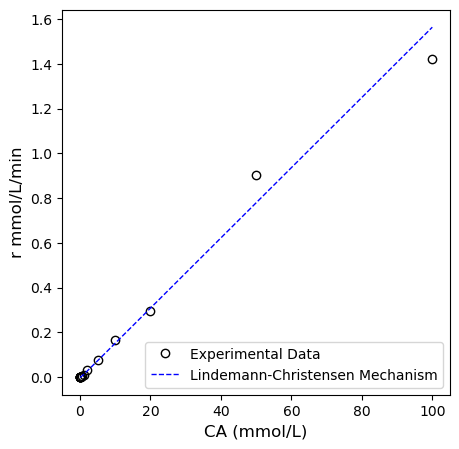

In [39]:
def r_model(k1, Kprime, CA):
    return k1*CA**2/(1 + Kprime*CA)

r_mod = r_model(k1_opt, Kprime_opt, CA_exp)

plt.figure(1, figsize = (5, 5))
plt.plot(CA_exp, r_exp, marker = 'o', markeredgecolor = 'black', markerfacecolor = 'none', linestyle = 'none', label = 'Experimental Data')
plt.plot(CA_exp, r_mod, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'Lindemann-Christensen Mechanism')
#plt.loglog(CA_exp, r_exp, marker = 'o', markeredgecolor = 'black', markerfacecolor = 'none', linestyle = 'none', label = 'Experimental Data')
#plt.loglog(CA_exp, r_mod, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'Lindemann-Christensen Mechanism')
plt.xlabel('CA (mmol/L)', fontsize = 12)
plt.ylabel('r mmol/L/min', fontsize = 12)
plt.legend(loc = 'lower right')
plt.show()

Note the magnitude of errors associated with small and large reaction rates.

In [38]:
print(np.vstack([r_exp, r_mod, r_exp - r_mod, ((r_exp - r_mod))**2]).T)

[[ 4.02000000e-08  4.84927224e-08 -8.29272242e-09  6.87692452e-17]
 [ 2.18000000e-07  1.93373018e-07  2.46269817e-08  6.06488229e-16]
 [ 1.19600000e-06  1.19750822e-06 -1.50821896e-09  2.27472443e-18]
 [ 5.06000000e-06  4.71798839e-06  3.42011605e-07  1.16971938e-13]
 [ 1.95000000e-05  1.83208443e-05  1.17915568e-06  1.39040811e-12]
 [ 1.16800000e-04  1.05281786e-04  1.15182143e-05  1.32669260e-10]
 [ 3.64000000e-04  3.71282036e-04 -7.28203642e-06  5.30280545e-11]
 [ 1.37800000e-03  1.20085816e-03  1.77141838e-04  3.13792306e-08]
 [ 4.06000000e-03  4.76763120e-03 -7.07631197e-04  5.00741910e-07]
 [ 1.04600000e-02  1.18601465e-02 -1.40014646e-03  1.96041010e-06]
 [ 3.20000000e-02  2.70135041e-02  4.98649592e-03  2.48651415e-05]
 [ 7.50000000e-02  7.36706031e-02  1.32939687e-03  1.76729603e-06]
 [ 1.68000000e-01  1.51943616e-01  1.60563840e-02  2.57807467e-04]
 [ 2.98000000e-01  3.08708707e-01 -1.07087072e-02  1.14676411e-04]
 [ 9.04000000e-01  7.79189340e-01  1.24810660e-01  1.55777010e